Source - http://www.math.uwaterloo.ca/~rwoldfor/software/R-code/checker-nnet.r

In [1]:
# Handy function to capture the pathname for the files we will load.
web441 <- function(x)
         {
            paste('http://www.math.uwaterloo.ca/~rwoldfor/software/R-code/',x,sep='')
         }

In [2]:
# Get the data:
source(web441('checker.R'))

In [3]:
dim(checker.train)
head(checker.train)

[1] 55  3

x1    x2 y
1 2.04  1.29 0
2 3.14  1.66 0
3 1.73  3.54 0
4 2.53  0.14 0
5 1.16  1.15 0
6 1.01 -2.65 0

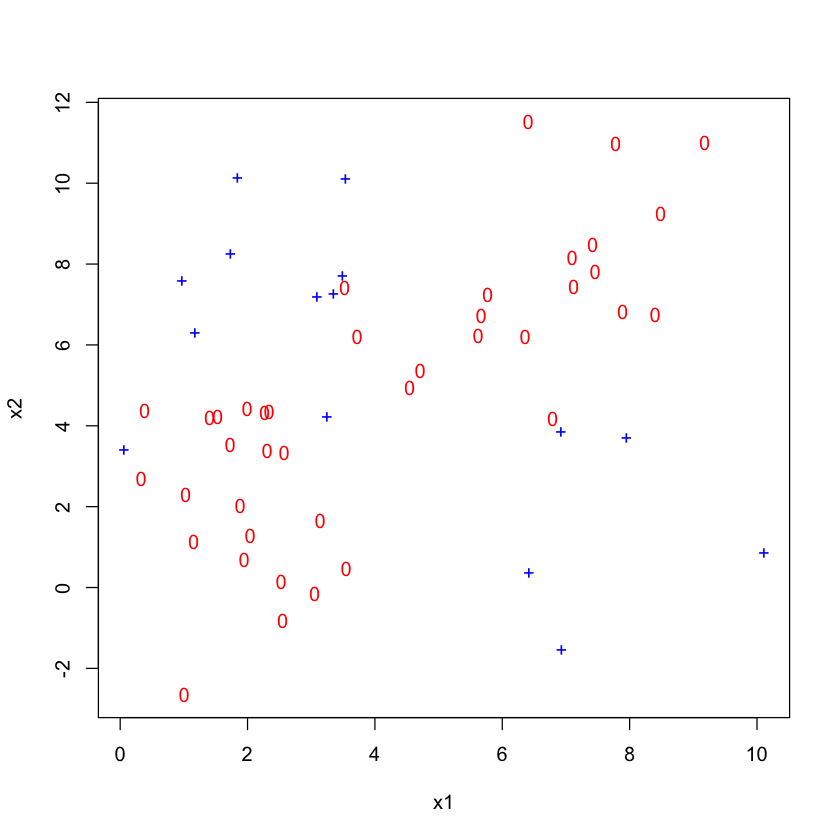

In [4]:
# plot it
x1.range <- range(checker.train[,"x1"])
x2.range <- range(checker.train[,"x2"])
plot(0,0,xlim=x1.range, ylim = x2.range, xlab = "x1", ylab = "x2", type ="n")
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0", col="red", cex=1)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+", col="blue", cex=1)

In [5]:
# Load neural net library
library(nnet)

In [6]:
#  First, save the values of the obeserved "y" s in the training
#  data (since I will need these for a calculation later)
checker.y <- checker.train[,"y"]

In [7]:
# For the neural net code, the response "y" needs to be 
# turned into a "factor" (of known levels to match the classes)
checker.train[,"y"] <- factor(checker.train[,"y"])

In [8]:
# Build the neural net  (two input variables; one output, y;
# one hidden layer of two nodes; penalty based on
# weight decay; max iterations = 1000)

checker.net <- nnet( y ~ x1 + x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

# weights:  9
initial  value 41.496438 
iter  10 value 21.622333
iter  20 value 15.872542
iter  30 value 14.912028
iter  40 value 14.855739
iter  50 value 14.855725
final  value 14.855725 
converged


In [9]:
summary(checker.net)

a 2-2-1 network with 9 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  7.68  -1.96   1.44 
 b->h2 i1->h2 i2->h2 
  6.63   4.08  -2.84 
 b->o h1->o h2->o 
 8.42 -6.48 -5.52 

In [10]:
# From this you can actually construct the weights for the neural net
#
# The weights are stored on
checker.net$wts

[1]  7.684312 -1.956380  1.443142  6.629023  4.081743 -2.842952  8.415361
[8] -6.477055 -5.521164

In [11]:
#  as is the value of the fitting criterion
checker.net$value

[1] 14.85572

In [12]:
#  fitted values for the training data
head(checker.net$fitted.values)

[,1]
1 0.02771081
2 0.03050411
3 0.03109239
4 0.03708977
5 0.02723350
6 0.06131989

In [13]:
# and the residuals
head(checker.net$residuals)

[,1]
1 -0.02771081
2 -0.03050411
3 -0.03109239
4 -0.03708977
5 -0.02723350
6 -0.06131989

In [14]:
# which are just (here's where we use the original y's)
head(checker.y - checker.net$fitted.values)

[,1]
1 -0.02771081
2 -0.03050411
3 -0.03109239
4 -0.03708977
5 -0.02723350
6 -0.06131989

In [15]:
# The following shows this
head((checker.y - checker.net$fitted.values) - checker.net$residuals)

[,1]
1    0
2    0
3    0
4    0
5    0
6    0

In [16]:
print(x1.range); print(x2.range)

[1]  0.06 10.11
[1] -2.65 11.53


In [17]:
#  Now we see what the net's predictions are on the usual grid:
xgrid <- expand.grid(x1=seq(x1.range[1], x1.range[2], length = 21),
                     x2=seq(x2.range[1], x2.range[2], length = 21))
print(21 * 21)
print(dim(xgrid))
head(xgrid)

[1] 441
[1] 441   2


x1    x2
1 0.0600 -2.65
2 0.5625 -2.65
3 1.0650 -2.65
4 1.5675 -2.65
5 2.0700 -2.65
6 2.5725 -2.65

In [18]:
# Compute the fitted probabilities over this grid so that we can plot them.
pHat <- predict(checker.net, newdata = xgrid, type="raw")
print(dim(pHat))
head(pHat)

[1] 441   1


[,1]
1 0.03128141
2 0.03927341
3 0.06627628
4 0.17284547
5 0.49049136
6 0.79630413

In [19]:
# Put the predicted probabilities in the grid to be used by the contour program
pHat <- matrix(pHat, nrow = 21, ncol = 21, byrow = FALSE)

In [20]:
dim(pHat)

[1] 21 21

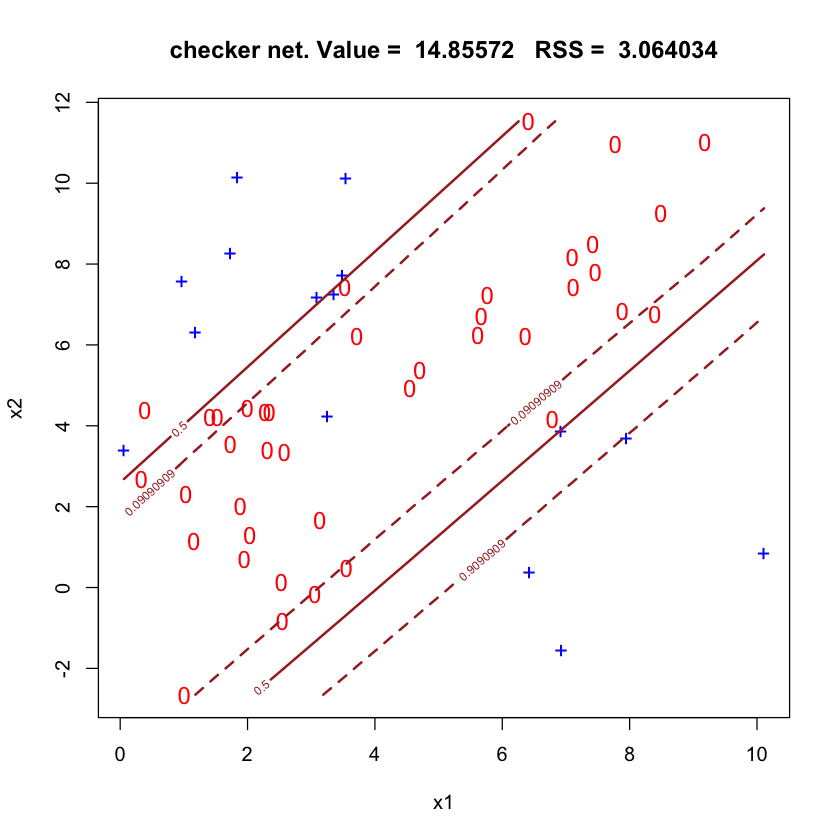

In [21]:
# plot it
#quartz()  #OS X Quartz Device
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("checker net. Value = ",prettyNum(checker.net$value),
            "  RSS = ", prettyNum(sum(checker.net$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0", col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+", col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [22]:
#  What happens when we repeat this?
checker.net1 <- nnet( y ~ x1 + x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

# weights:  9
initial  value 36.500668 
iter  10 value 27.110012
iter  20 value 25.775265
iter  30 value 19.380721
iter  40 value 14.292939
iter  50 value 14.280942
iter  60 value 14.275280
iter  70 value 14.203175
iter  80 value 14.175634
iter  90 value 14.175402
final  value 14.175401 
converged


In [23]:
summary(checker.net1)

a 2-2-1 network with 9 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  7.64  -1.93   1.43 
 b->h2 i1->h2 i2->h2 
 -6.58  -4.04   2.81 
 b->o h1->o h2->o 
 3.37 -7.13  5.89 

In [24]:
# Compute the fitted probabilities over this grid so that we can plot them.
pHat1 <- predict(checker.net1, newdata = xgrid, type="raw")

In [25]:
# Put the predicted probabilities in the grid to be used by the contour
#  program
pHat1 <- matrix(pHat1, nrow = 21, ncol = 21, byrow = FALSE)

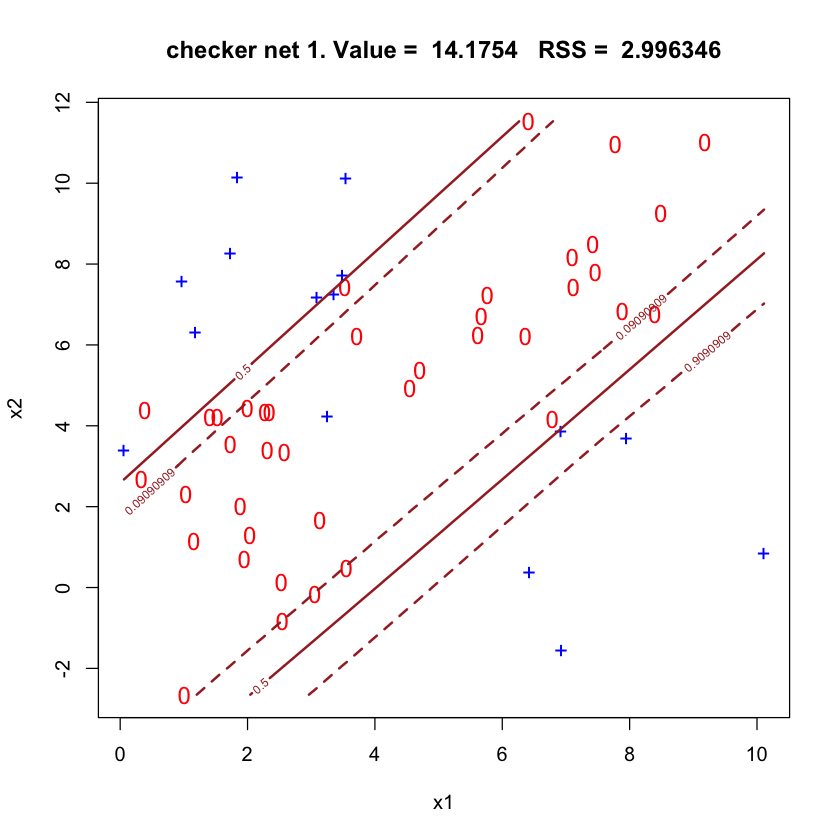

In [26]:
# plot it
#quartz()
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("checker net 1. Value = ",prettyNum(checker.net1$value),
            "  RSS = ", prettyNum(sum(checker.net1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0", col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+", col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [27]:
#  And again?
checker.net2 <- nnet( y ~ x1 + x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(checker.net2)

# weights:  9
initial  value 47.191165 
iter  10 value 19.481454
iter  20 value 14.217211
iter  30 value 14.094289
iter  40 value 14.092023
iter  50 value 14.091915
iter  50 value 14.091915
final  value 14.091915 
converged


a 2-2-1 network with 9 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  6.59   4.06  -2.82 
 b->h2 i1->h2 i2->h2 
 -7.67   1.92  -1.42 
 b->o h1->o h2->o 
 2.09 -5.84  7.58 

In [28]:
# Compute the fitted probabilities over this grid and plot them.
pHat2 <- predict(checker.net2, newdata = xgrid, type="raw")
pHat2 <- matrix(pHat2, nrow = 21, ncol = 21, byrow = FALSE)

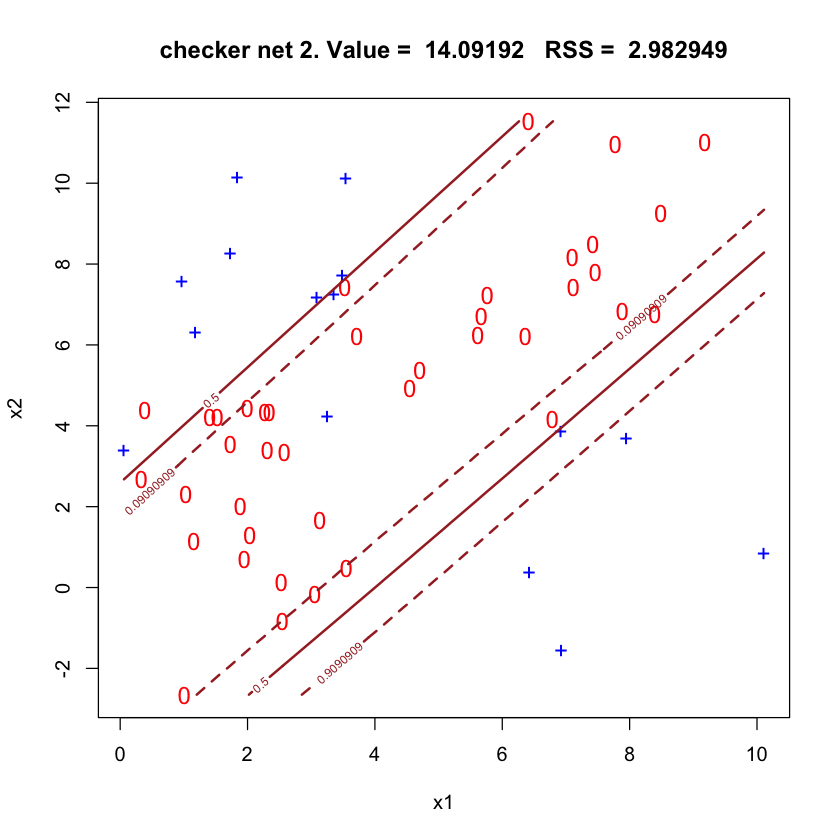

In [29]:
# plot it
#quartz()
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("checker net 2. Value = ",prettyNum(checker.net2$value),
            "  RSS = ", prettyNum(sum(checker.net2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [30]:
#  Each of the above was a local minimum, determined by a random start.
#  We could fix the start by ensuring that the seed of the random number 
#  generator is identical at each repetition (and hence the same start)
set.seed(12345)
checker.netfixed <- nnet( y ~ x1 + x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(checker.netfixed)
pHatf <- predict(checker.netfixed, newdata = xgrid, type="raw")
pHatf <- matrix(pHatf, nrow = 21, ncol = 21, byrow = FALSE)

# weights:  9
initial  value 36.421119 
iter  10 value 25.156960
iter  20 value 19.778300
iter  30 value 19.414481
iter  40 value 19.391150
final  value 19.391115 
converged


a 2-2-1 network with 9 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
 -7.09   2.03   0.73 
 b->h2 i1->h2 i2->h2 
  4.68   4.26  -2.48 
 b->o h1->o h2->o 
-0.12  5.72 -6.77 

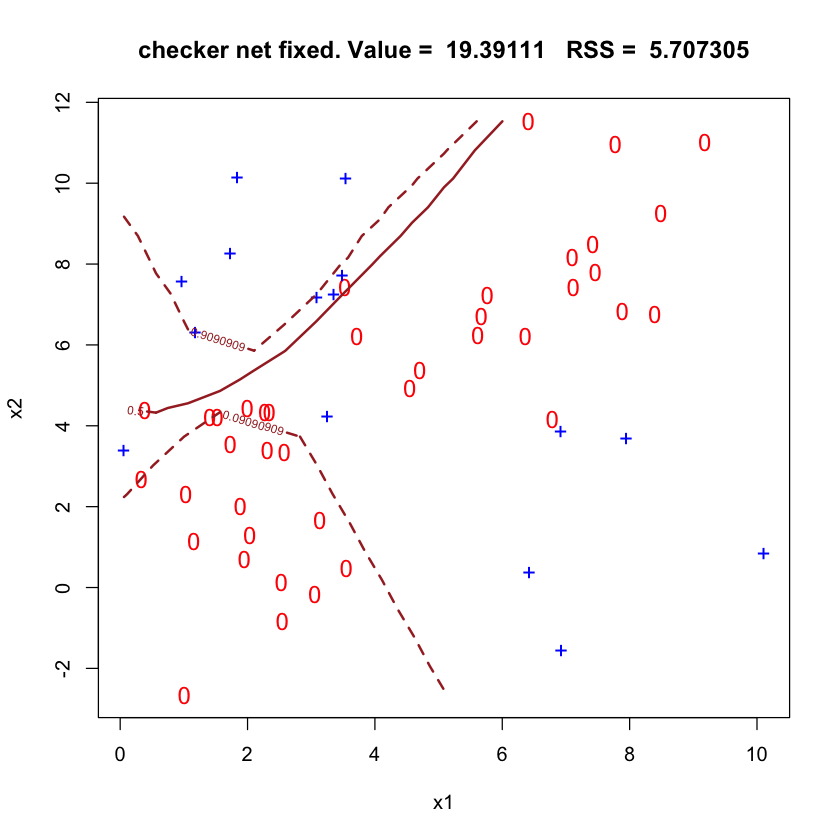

In [31]:
# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("checker net fixed. Value = ",prettyNum(checker.netfixed$value),
            "  RSS = ", prettyNum(sum(checker.netfixed$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHatf, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHatf, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [32]:
# Look at misclassification probabilities
#
#  On the training data
# Checker.net
checker.net$value
table(checker.train[,"y"],predict(checker.net, newdata= checker.train, type="raw") > 0.5)

[1] 14.85572

   
    FALSE TRUE
  0    39    1
  1     2   13

In [33]:
# checker.net1
checker.net1$value
table(checker.train[,"y"],predict(checker.net1, newdata= checker.train, type="raw") > 0.5)

[1] 14.1754

   
    FALSE TRUE
  0    39    1
  1     2   13

In [34]:
# checker.net2
checker.net2$value
table(checker.train[,"y"],predict(checker.net2, newdata= checker.train, type="raw") > 0.5)

[1] 14.09192

   
    FALSE TRUE
  0    39    1
  1     2   13

In [35]:
# checker.netfixed
checker.netfixed$value
table(checker.train[,"y"],predict(checker.netfixed, newdata= checker.train, type="raw") > 0.5)

[1] 19.39111

   
    FALSE TRUE
  0    38    2
  1     7    8

In [36]:
#  On the test data
# Checker.net
checker.net$value
table(checker.test[,"y"], predict(checker.net, newdata= checker.test, type="raw") > 0.5)

[1] 14.85572

   
    FALSE TRUE
  0    88   12
  1    27   73

In [37]:
# checker.net1
checker.net1$value
table(checker.test[,"y"], predict(checker.net1, newdata= checker.test, type="raw") > 0.5)

[1] 14.1754

   
    FALSE TRUE
  0    88   12
  1    27   73

In [38]:
# checker.net2
checker.net2$value
table(checker.test[,"y"], predict(checker.net2, newdata= checker.test, type="raw") > 0.5)

[1] 14.09192

   
    FALSE TRUE
  0    88   12
  1    27   73

In [39]:
# checker.netfixed
checker.netfixed$value
table(checker.test[,"y"], predict(checker.netfixed, newdata= checker.test, type="raw") > 0.5)

[1] 19.39111

   
    FALSE TRUE
  0    98    2
  1    63   37

#### New network with interaction term

In [40]:
# 
# Build the neural net exactly as before, except that we
# add another input variable, the interaction term x1:x2
#
nn.int <- nnet( y ~ x1 + x2 + x1:x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)
summary(nn.int)

# weights:  11
initial  value 34.257319 
iter  10 value 26.838559
iter  20 value 17.000685
iter  30 value 10.221473
iter  40 value 9.977420
iter  50 value 9.968451
final  value 9.968439 
converged


a 3-2-1 network with 11 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 
  9.24  -2.16  -1.94   0.47 
 b->h2 i1->h2 i2->h2 i3->h2 
 -1.57  -3.72   1.36  -3.00 
  b->o  h1->o  h2->o 
  4.54 -10.30   7.21 

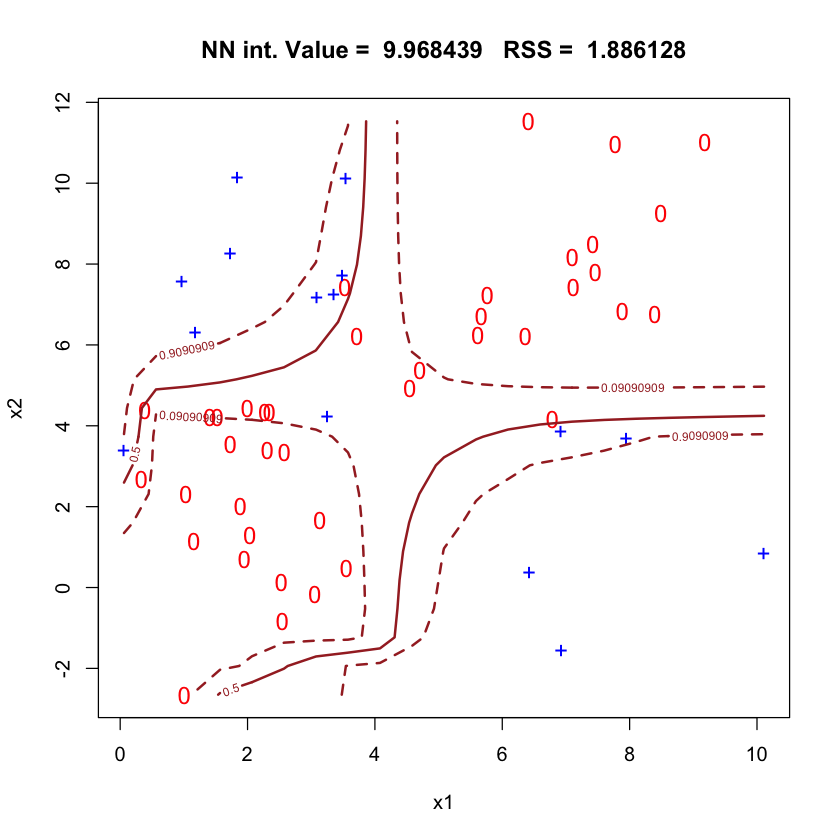

In [41]:
# From this you can actually construct the weights for the neural net

# Compute the fitted probabilities over this grid so that we can plot them.

pHati <- predict(nn.int, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHati <- matrix(pHati, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,xlab = "x1", ylab = "x2", type ="n")
title(paste("NN int. Value = ",prettyNum(nn.int$value),
            "  RSS = ", prettyNum(sum(nn.int$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  11
initial  value 37.384858 
iter  10 value 30.023472
iter  20 value 25.459848
iter  30 value 14.433089
iter  40 value 12.185537
iter  50 value 11.968615
iter  60 value 11.935144
iter  70 value 11.933282
iter  70 value 11.933282
final  value 11.933282 
converged


a 3-2-1 network with 11 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 
 10.04  -2.02  -1.65   0.36 
 b->h2 i1->h2 i2->h2 i3->h2 
 -4.07   1.86   1.97  -0.61 
 b->o h1->o h2->o 
 0.84 -9.00  5.89 

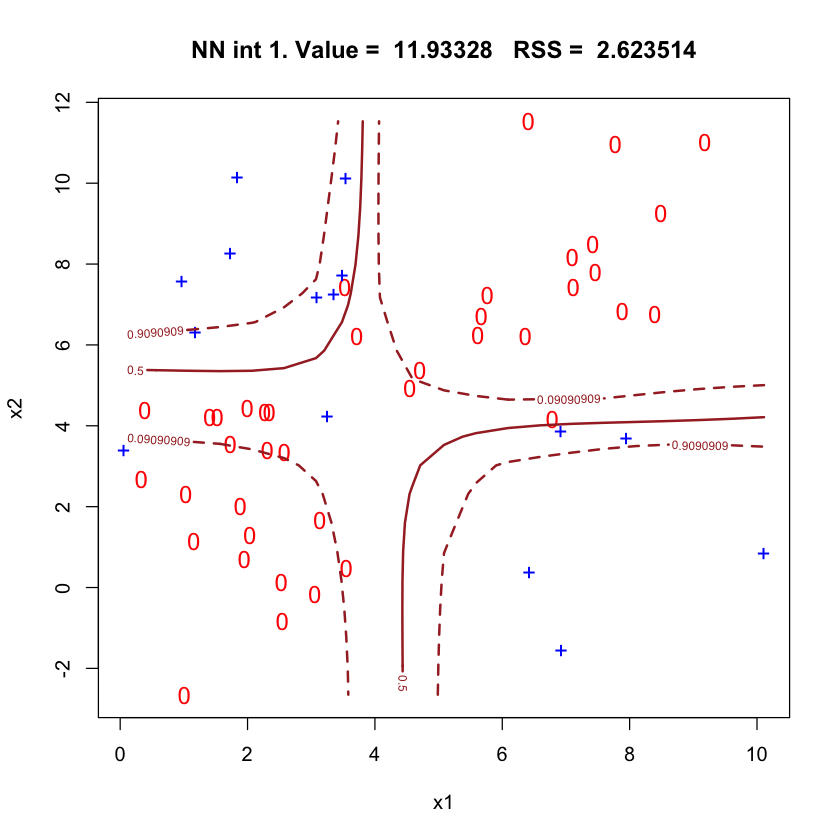

In [42]:
#
#  Repeat this twice
#
nn.int1 <- nnet( y ~ x1 + x2 + x1:x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.int1)

# From this you can actually construct the weights for the neural net
# Compute the fitted probabilities over this grid so that we can plot them.

pHati1 <- predict(nn.int1, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHati1 <- matrix(pHati1, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN int 1. Value = ",prettyNum(nn.int1$value),
            "  RSS = ", prettyNum(sum(nn.int1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  11
initial  value 33.241717 
iter  10 value 27.438508
iter  20 value 22.677246
iter  30 value 21.242688
iter  40 value 10.018241
iter  50 value 9.759248
iter  60 value 9.752606
iter  70 value 9.751852
final  value 9.751852 
converged


a 3-2-1 network with 11 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 
 -9.12   2.11   1.89  -0.46 
 b->h2 i1->h2 i2->h2 i3->h2 
  1.56   3.74  -1.38   3.05 
 b->o h1->o h2->o 
 1.23 10.96 -6.99 

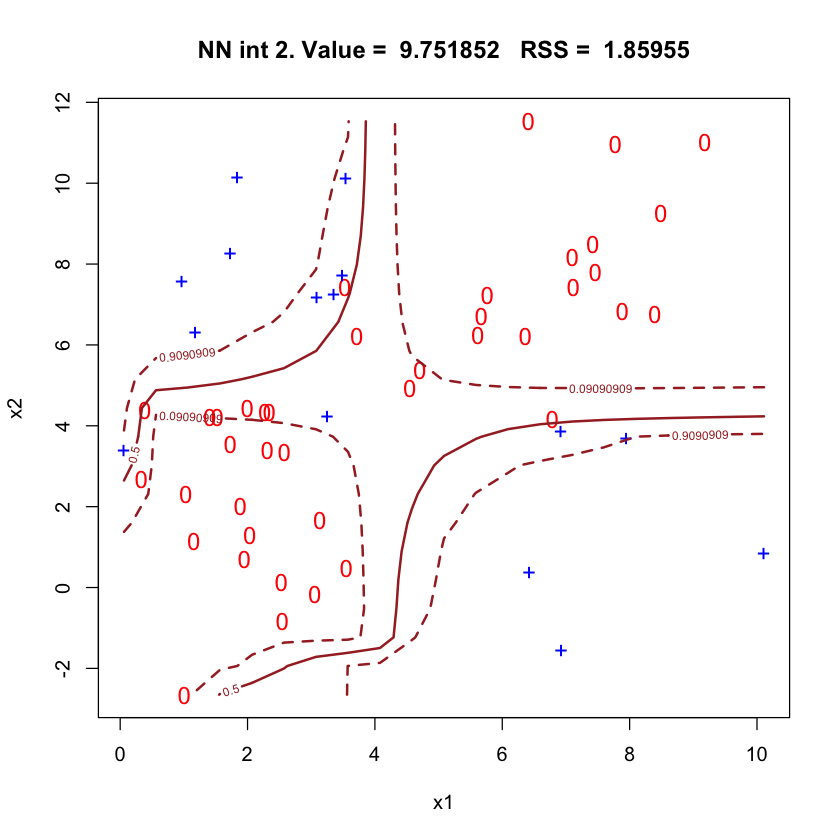

In [43]:
#
# Again
#
nn.int2 <- nnet( y ~ x1 + x2 + x1:x2, 
                    data = checker.train, 
                    size = 2, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.int2)

# From this you can actually construct the weights for the neural net

# Compute the fitted probabilities over this grid so that we can plot them.

pHati2 <- predict(nn.int2, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHati2 <- matrix(pHati2, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n" )
title(paste("NN int 2. Value = ",prettyNum(nn.int2$value),
            "  RSS = ", prettyNum(sum(nn.int2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHati2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [44]:
# Look at misclassification probabilities
#
#  On the training data
#
# Checker.net
nn.int$value
table(checker.train[,"y"], predict(nn.int, newdata= checker.train, type="raw") > 0.5)

[1] 9.968439

   
    FALSE TRUE
  0    39    1
  1     1   14

In [45]:
# checker.net1
nn.int1$value
table(checker.train[,"y"], predict(nn.int1, newdata= checker.train, type="raw") > 0.5)

[1] 11.93328

   
    FALSE TRUE
  0    39    1
  1     2   13

In [46]:
# checker.net2
nn.int2$value
table(checker.train[,"y"], predict(nn.int2, newdata= checker.train, type="raw") > 0.5)

[1] 9.751852

   
    FALSE TRUE
  0    39    1
  1     1   14

In [47]:
#
#  On the test data
#
# Checker.net
nn.int$value
table(checker.test[,"y"], predict(nn.int, newdata= checker.test, type="raw") > 0.5)

[1] 9.968439

   
    FALSE TRUE
  0    95    5
  1    27   73

In [48]:
# checker.net1
nn.int1$value
table(checker.test[,"y"], predict(nn.int1, newdata= checker.test, type="raw") > 0.5)

[1] 11.93328

   
    FALSE TRUE
  0    95    5
  1    27   73

In [49]:
# checker.net2
nn.int2$value
table(checker.test[,"y"], predict(nn.int2, newdata= checker.test, type="raw") > 0.5)

[1] 9.751852

   
    FALSE TRUE
  0    95    5
  1    27   73

### Increase the size of hidden layer without interaction

# weights:  13
initial  value 46.801949 
iter  10 value 21.718829
iter  20 value 19.753888
iter  30 value 15.115539
iter  40 value 11.925864
iter  50 value 11.713051
iter  60 value 11.704247
iter  70 value 11.703862
final  value 11.703858 
converged


a 2-3-1 network with 13 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  4.96   4.30  -2.65 
 b->h2 i1->h2 i2->h2 
  7.15  -1.91  -0.88 
 b->h3 i1->h3 i2->h3 
 -5.55   1.67  -1.55 
 b->o h1->o h2->o h3->o 
 4.46 -7.40 -4.74  6.65 

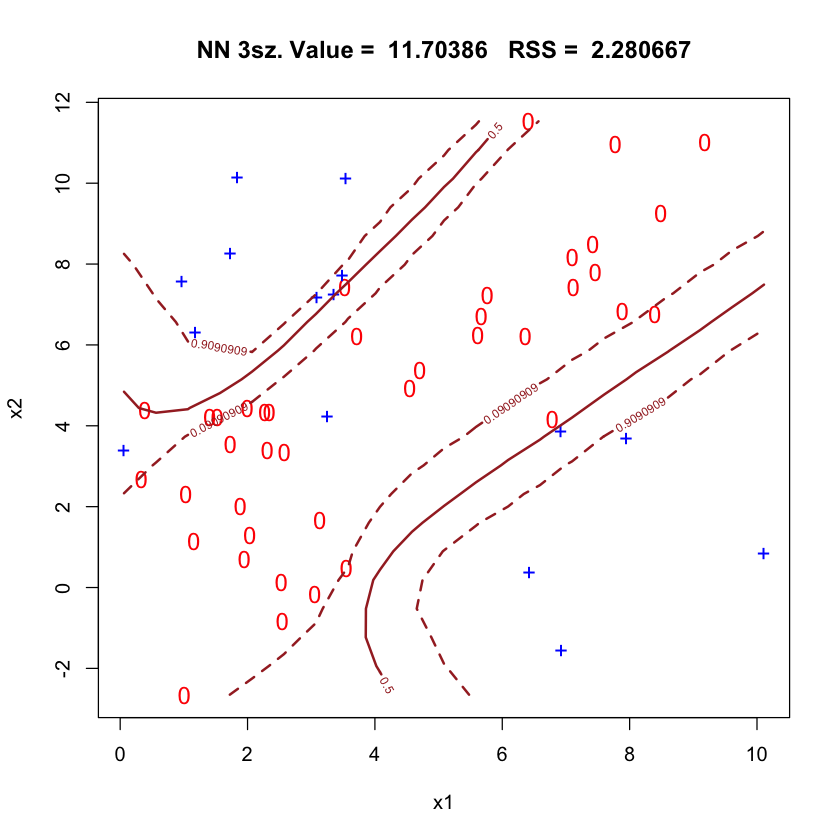

In [50]:
#####################
#
#
#   Changing the size of the hidden layer
#   (no interaction)
#
nn.3sz <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 3, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.3sz)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat3sz <- predict(nn.3sz, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour program

pHat3sz <- matrix(pHat3sz, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 3sz. Value = ",prettyNum(nn.3sz$value),
            "  RSS = ", prettyNum(sum(nn.3sz$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  13
initial  value 46.267895 
iter  10 value 23.336139
iter  20 value 19.699461
iter  30 value 19.584019
iter  40 value 19.575629
iter  50 value 19.574928
final  value 19.574923 
converged


a 2-3-1 network with 13 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  4.77   4.28  -2.51 
 b->h2 i1->h2 i2->h2 
  7.09  -2.00  -0.74 
 b->h3 i1->h3 i2->h3 
  0.53   1.08   1.14 
 b->o h1->o h2->o h3->o 
 2.71 -6.39 -5.38  2.51 

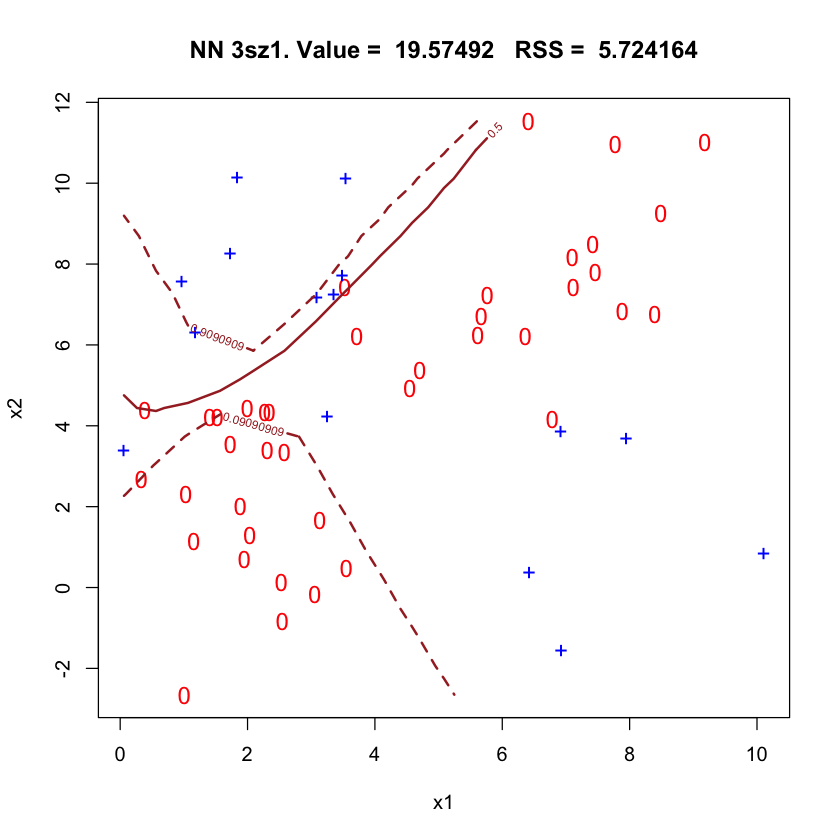

In [51]:
#
#  Repeat this twice
#


nn.3sz1 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 3, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.3sz1)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat3sz1 <- predict(nn.3sz1, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat3sz1 <- matrix(pHat3sz1, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 3sz1. Value = ",prettyNum(nn.3sz1$value),
            "  RSS = ", prettyNum(sum(nn.3sz1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  13
initial  value 47.366654 
iter  10 value 29.851439
iter  20 value 25.435648
iter  30 value 20.580368
iter  40 value 13.332802
iter  50 value 11.724896
iter  60 value 11.706463
iter  70 value 11.703879
iter  80 value 11.703858
iter  80 value 11.703858
iter  80 value 11.703858
final  value 11.703858 
converged


a 2-3-1 network with 13 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
 -5.55   1.67  -1.55 
 b->h2 i1->h2 i2->h2 
  7.15  -1.91  -0.88 
 b->h3 i1->h3 i2->h3 
  4.96   4.30  -2.65 
 b->o h1->o h2->o h3->o 
 4.46  6.65 -4.74 -7.40 

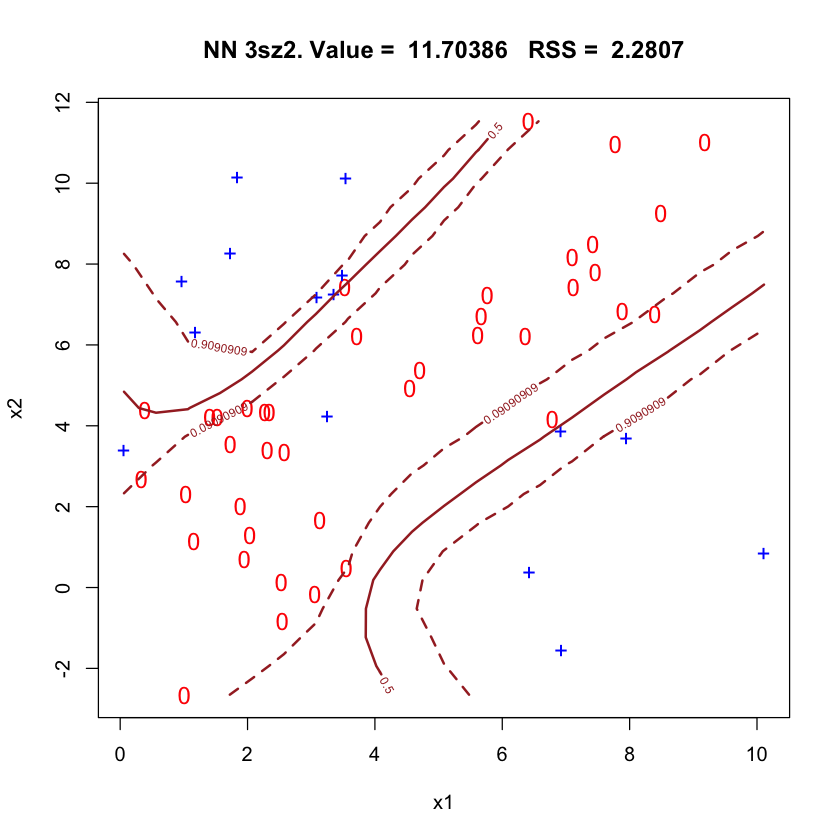

In [52]:
#
# Again
#

nn.3sz2 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 3, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.3sz2)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat3sz2 <- predict(nn.3sz2, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat3sz2 <- matrix(pHat3sz2, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 3sz2. Value = ",prettyNum(nn.3sz2$value),
            "  RSS = ", prettyNum(sum(nn.3sz2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat3sz2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [53]:
# Look at misclassification probabilities
#
#  On the training data
#
# nn.3sz
nn.3sz$value
table(checker.train[,"y"], 
      predict(nn.3sz, newdata= checker.train, type="raw") > 0.5)

[1] 11.70386

   
    FALSE TRUE
  0    39    1
  1     2   13

In [54]:
# nn.3sz1
nn.3sz1$value
table(checker.train[,"y"], 
      predict(nn.3sz1, newdata= checker.train, type="raw") > 0.5)

[1] 19.57492

   
    FALSE TRUE
  0    38    2
  1     7    8

In [55]:
# nn.3sz2
nn.3sz2$value
table(checker.train[,"y"], 
      predict(nn.3sz2, newdata= checker.train, type="raw") > 0.5)

[1] 11.70386

   
    FALSE TRUE
  0    39    1
  1     2   13

In [56]:
#
#  On the test data
#
# Checker.net
nn.3sz$value
table(checker.test[,"y"], 
      predict(nn.3sz, newdata= checker.test, type="raw") > 0.5)

[1] 11.70386

   
    FALSE TRUE
  0    89   11
  1    25   75

In [57]:
# checker.net1
nn.3sz1$value
table(checker.test[,"y"], 
      predict(nn.3sz1, newdata= checker.test, type="raw") > 0.5)

[1] 19.57492

   
    FALSE TRUE
  0    98    2
  1    63   37

In [58]:
# checker.net2
nn.3sz2$value
table(checker.test[,"y"], 
      predict(nn.3sz2, newdata= checker.test, type="raw") > 0.5)

[1] 11.70386

   
    FALSE TRUE
  0    89   11
  1    25   75

# weights:  17
initial  value 44.768477 
iter  10 value 28.935383
iter  20 value 25.294177
iter  30 value 16.570260
iter  40 value 12.534172
iter  50 value 11.743427
iter  60 value 11.584499
iter  70 value 11.576383
final  value 11.576234 
converged


a 2-4-1 network with 17 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  4.88   4.28  -2.62 
 b->h2 i1->h2 i2->h2 
 -0.24   0.49   1.23 
 b->h3 i1->h3 i2->h3 
 -5.02   1.63  -1.62 
 b->h4 i1->h4 i2->h4 
  7.33  -1.92  -0.91 
 b->o h1->o h2->o h3->o h4->o 
 2.12 -7.55  2.53  6.71 -4.85 

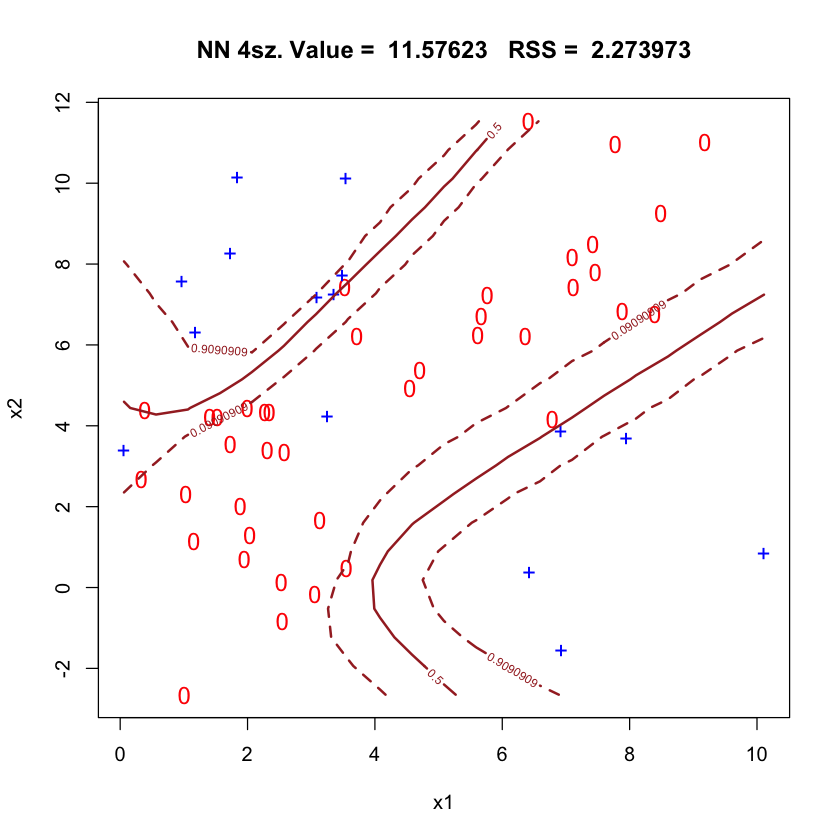

In [59]:
#####################
#
#
#   Size of the hidden layer = 4
#   (no interaction)
#


nn.4sz <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 4, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.4sz)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat4sz <- predict(nn.4sz, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat4sz <- matrix(pHat4sz, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 4sz. Value = ",prettyNum(nn.4sz$value),
            "  RSS = ", prettyNum(sum(nn.4sz$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  17
initial  value 43.944250 
iter  10 value 21.230704
iter  20 value 12.277671
iter  30 value 11.860256
iter  40 value 11.819582
iter  50 value 11.817472
iter  60 value 11.816804
final  value 11.816793 
converged


a 2-4-1 network with 17 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  0.87  -0.57  -1.24 
 b->h2 i1->h2 i2->h2 
 -1.40   2.54  -3.99 
 b->h3 i1->h3 i2->h3 
  4.54   4.32  -2.58 
 b->h4 i1->h4 i2->h4 
  8.54  -1.96  -1.15 
 b->o h1->o h2->o h3->o h4->o 
 5.14 -1.71  5.60 -7.98 -5.63 

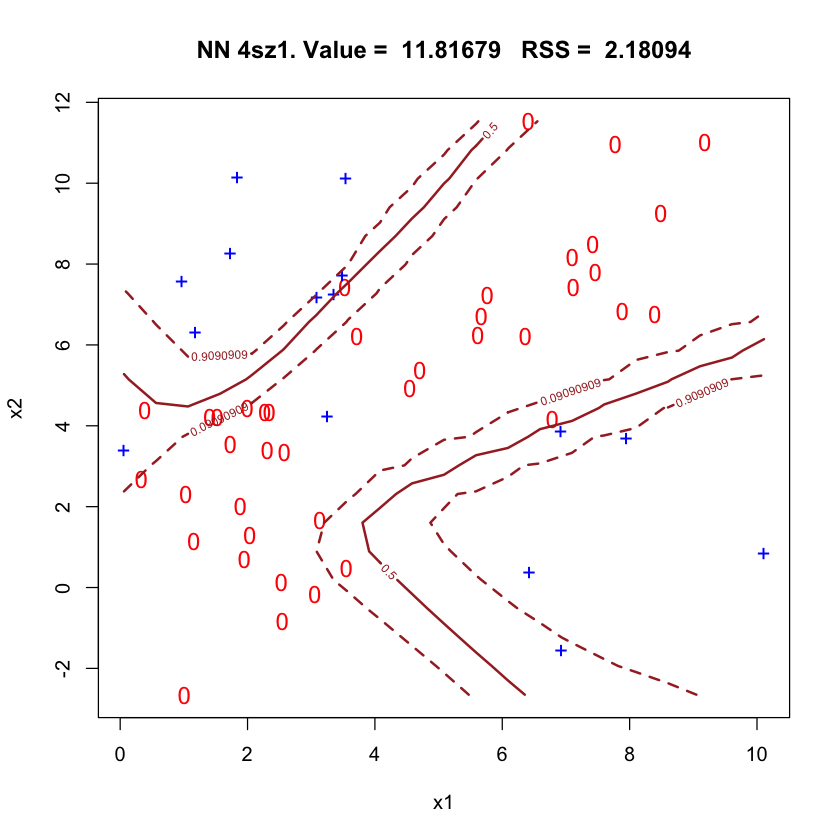

In [60]:
#
#  Repeat this twice
#


nn.4sz1 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 4, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.4sz1)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat4sz1 <- predict(nn.4sz1, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat4sz1 <- matrix(pHat4sz1, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 4sz1. Value = ",prettyNum(nn.4sz1$value),
            "  RSS = ", prettyNum(sum(nn.4sz1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  17
initial  value 33.874217 
iter  10 value 20.598021
iter  20 value 11.983412
iter  30 value 11.609990
iter  40 value 11.536045
iter  50 value 11.520502
iter  60 value 11.520113
iter  70 value 11.520093
iter  70 value 11.520093
iter  70 value 11.520093
final  value 11.520093 
converged


a 2-4-1 network with 17 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
  4.42   4.28  -2.53 
 b->h2 i1->h2 i2->h2 
  0.43  -0.50  -1.12 
 b->h3 i1->h3 i2->h3 
 -1.23   2.55  -4.05 
 b->h4 i1->h4 i2->h4 
 -8.66   2.02   1.15 
 b->o h1->o h2->o h3->o h4->o 
-0.36 -8.65 -1.25  5.65  6.19 

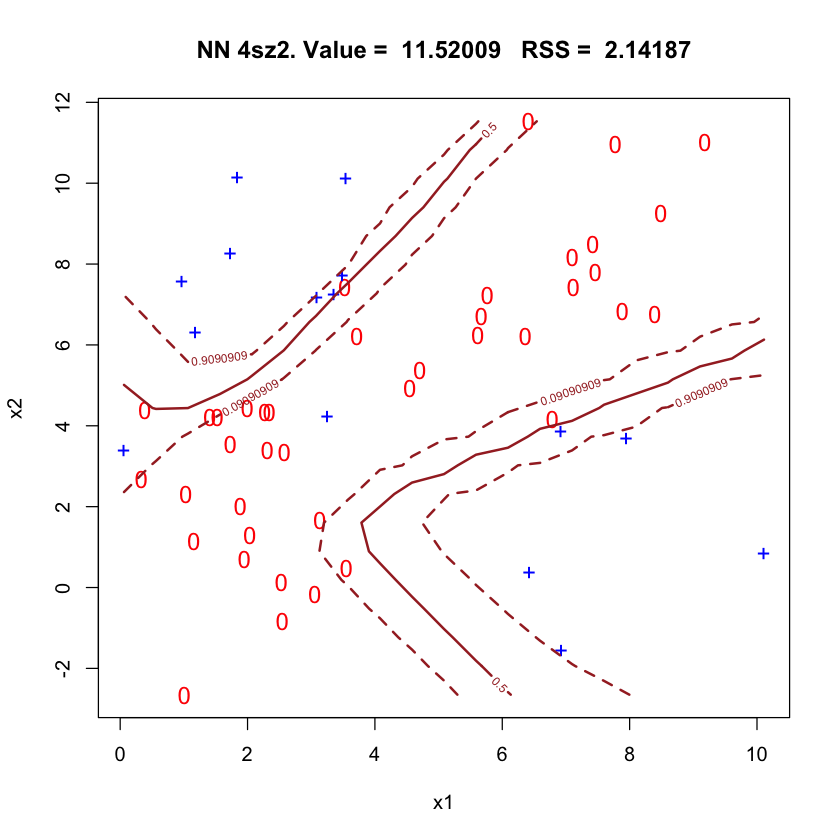

In [61]:
#
# Again
#

nn.4sz2 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 4, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.4sz2)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat4sz2 <- predict(nn.4sz2, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat4sz2 <- matrix(pHat4sz2, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 4sz2. Value = ",prettyNum(nn.4sz2$value),
            "  RSS = ", prettyNum(sum(nn.4sz2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat4sz2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [62]:
# Look at misclassification probabilities
#
#  On the training data
#
# nn.4sz
nn.4sz$value
table(checker.train[,"y"], 
      predict(nn.4sz, newdata= checker.train, type="raw") > 0.5)

[1] 11.57623

   
    FALSE TRUE
  0    39    1
  1     2   13

In [63]:
# nn.4sz1
nn.4sz1$value
table(checker.train[,"y"], 
      predict(nn.4sz1, newdata= checker.train, type="raw") > 0.5)

[1] 11.81679

   
    FALSE TRUE
  0    40    0
  1     2   13

In [64]:
# nn.4sz2
nn.4sz2$value
table(checker.train[,"y"], 
      predict(nn.4sz2, newdata= checker.train, type="raw") > 0.5)

[1] 11.52009

   
    FALSE TRUE
  0    40    0
  1     2   13

In [65]:
#
#  On the test data
#
# Checker.net
nn.4sz$value
table(checker.test[,"y"], 
      predict(nn.4sz, newdata= checker.test, type="raw") > 0.5)

[1] 11.57623

   
    FALSE TRUE
  0    89   11
  1    24   76

In [66]:
# checker.net1
nn.4sz1$value
table(checker.test[,"y"], 
      predict(nn.4sz1, newdata= checker.test, type="raw") > 0.5)

[1] 11.81679

   
    FALSE TRUE
  0    93    7
  1    24   76

In [67]:
# checker.net2
nn.4sz2$value
table(checker.test[,"y"], 
      predict(nn.4sz2, newdata= checker.test, type="raw") > 0.5)

[1] 11.52009

   
    FALSE TRUE
  0    93    7
  1    24   76

# weights:  21
initial  value 62.850036 
iter  10 value 25.840527
iter  20 value 16.336826
iter  30 value 13.341778
iter  40 value 11.627240
iter  50 value 10.989627
iter  60 value 10.642623
iter  70 value 10.378769
iter  80 value 9.743916
iter  90 value 9.433716
iter 100 value 9.337426
iter 110 value 9.328297
iter 120 value 9.327891
iter 130 value 9.327597
final  value 9.327588 
converged


a 2-5-1 network with 21 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
 -5.42  -4.07   2.55 
 b->h2 i1->h2 i2->h2 
  3.47  -1.66   0.67 
 b->h3 i1->h3 i2->h3 
 -6.06  -0.18   1.48 
 b->h4 i1->h4 i2->h4 
  8.86  -1.97  -1.12 
 b->h5 i1->h5 i2->h5 
 -1.15   2.08  -3.40 
 b->o h1->o h2->o h3->o h4->o h5->o 
 0.12  8.18  3.97 -6.28 -9.75  3.79 

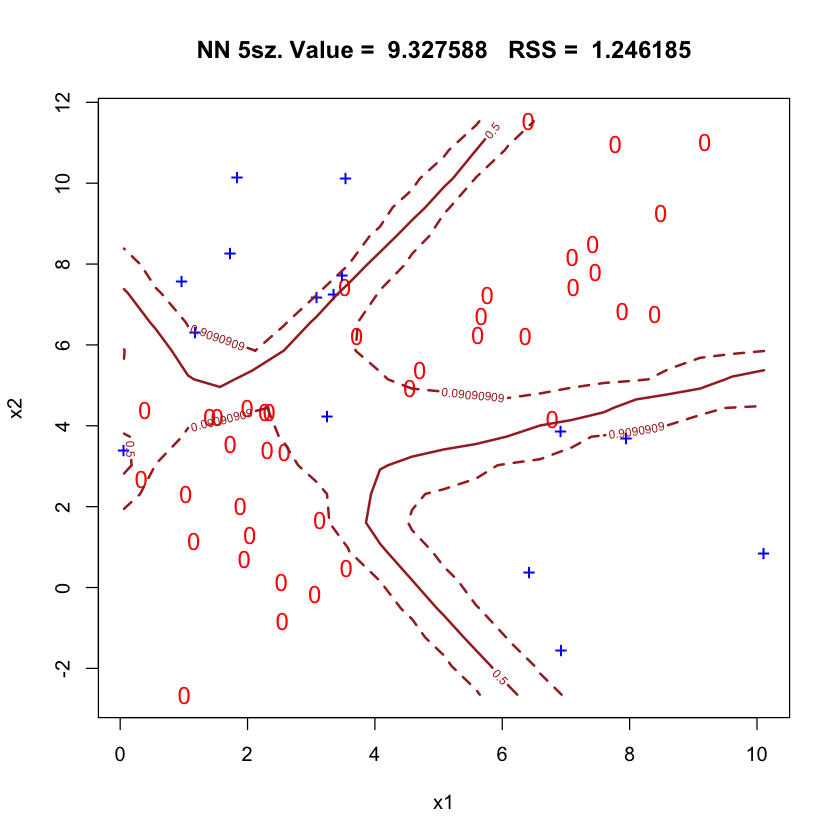

In [68]:
#####################
#
#
#   Size of the hidden layer = 5
#   (no interaction)
#


nn.5sz <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5sz)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5sz <- predict(nn.5sz, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5sz <- matrix(pHat5sz, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5sz. Value = ",prettyNum(nn.5sz$value),
            "  RSS = ", prettyNum(sum(nn.5sz$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  21
initial  value 49.896167 
iter  10 value 21.828499
iter  20 value 14.752392
iter  30 value 12.013853
iter  40 value 10.665616
iter  50 value 10.316102
iter  60 value 10.017226
iter  70 value 9.989084
iter  80 value 9.988226
final  value 9.988210 
converged


a 2-5-1 network with 21 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
 -5.42  -4.20   2.68 
 b->h2 i1->h2 i2->h2 
  9.11  -2.02  -1.22 
 b->h3 i1->h3 i2->h3 
 -0.83   1.48  -2.59 
 b->h4 i1->h4 i2->h4 
  0.05  -0.21  -0.67 
 b->h5 i1->h5 i2->h5 
  6.46  -0.02  -1.46 
 b->o h1->o h2->o h3->o h4->o h5->o 
-3.97  8.98 -9.52  2.03 -0.48  6.57 

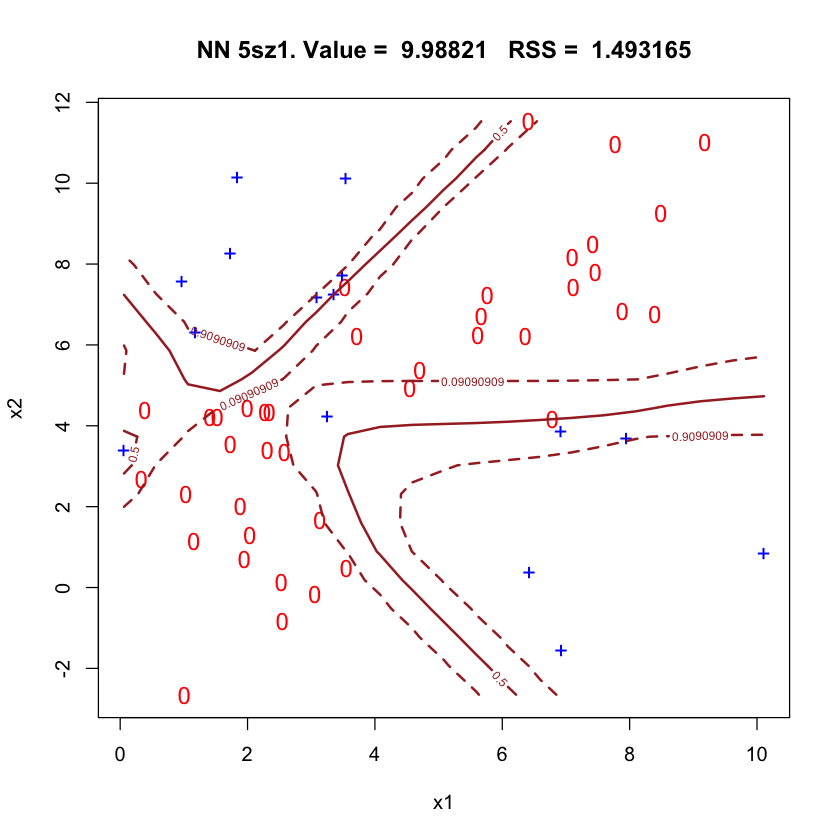

In [69]:
#
#  Repeat this twice
#


nn.5sz1 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5sz1)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5sz1 <- predict(nn.5sz1, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5sz1 <- matrix(pHat5sz1, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5sz1. Value = ",prettyNum(nn.5sz1$value),
            "  RSS = ", prettyNum(sum(nn.5sz1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  21
initial  value 44.958384 
iter  10 value 28.136516
iter  20 value 16.649570
iter  30 value 12.015641
iter  40 value 11.719135
iter  50 value 11.661122
iter  60 value 11.633406
iter  70 value 11.618699
iter  80 value 11.527548
iter  90 value 10.733158
iter 100 value 10.706382
iter 110 value 10.704798
final  value 10.704746 
converged


a 2-5-1 network with 21 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 
 -1.79   2.56  -3.87 
 b->h2 i1->h2 i2->h2 
 -1.04   0.67   1.35 
 b->h3 i1->h3 i2->h3 
  3.84  -1.44   0.28 
 b->h4 i1->h4 i2->h4 
  3.90   4.02  -2.21 
 b->h5 i1->h5 i2->h5 
  9.18  -2.16  -1.08 
 b->o h1->o h2->o h3->o h4->o h5->o 
 0.43  6.71  2.59  4.60 -6.85 -7.86 

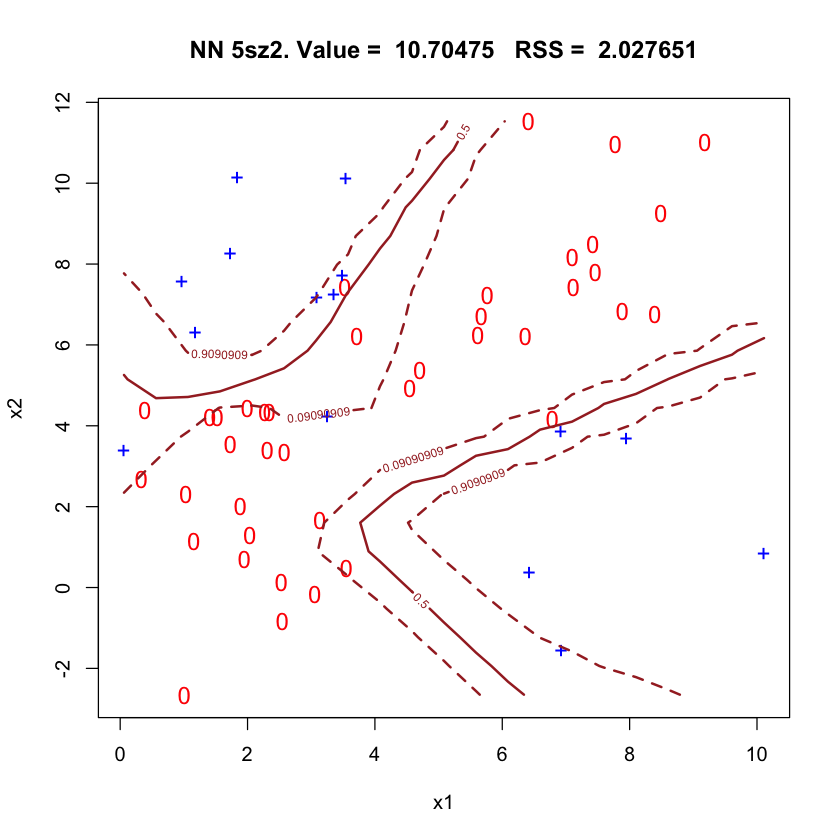

In [70]:
#
# Again
#

nn.5sz2 <- nnet( y ~ x1 + x2 , 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5sz2)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5sz2 <- predict(nn.5sz2, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5sz2 <- matrix(pHat5sz2, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5sz2. Value = ",prettyNum(nn.5sz2$value),
            "  RSS = ", prettyNum(sum(nn.5sz2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5sz2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [71]:
# Look at misclassification probabilities
#
#  On the training data
#
# nn.5sz
nn.5sz$value
table(checker.train[,"y"], 
      predict(nn.5sz, newdata= checker.train, type="raw") > 0.5)

[1] 9.327588

   
    FALSE TRUE
  0    39    1
  1     1   14

In [72]:
# nn.5sz1
nn.5sz1$value
table(checker.train[,"y"], 
      predict(nn.5sz1, newdata= checker.train, type="raw") > 0.5)

[1] 9.98821

   
    FALSE TRUE
  0    40    0
  1     1   14

In [73]:
# nn.5sz2
nn.5sz2$value
table(checker.train[,"y"], 
      predict(nn.5sz2, newdata= checker.train, type="raw") > 0.5)

[1] 10.70475

   
    FALSE TRUE
  0    39    1
  1     2   13

In [74]:
#
#  On the test data
#
# Checker.net
nn.5sz$value
table(checker.test[,"y"], 
      predict(nn.5sz, newdata= checker.test, type="raw") > 0.5)

[1] 9.327588

   
    FALSE TRUE
  0    95    5
  1    27   73

In [75]:
# checker.net1
nn.5sz1$value
table(checker.test[,"y"], 
      predict(nn.5sz1, newdata= checker.test, type="raw") > 0.5)

[1] 9.98821

   
    FALSE TRUE
  0    93    7
  1    26   74

In [76]:
# checker.net2
nn.5sz2$value
table(checker.test[,"y"], 
      predict(nn.5sz2, newdata= checker.test, type="raw") > 0.5)

[1] 10.70475

   
    FALSE TRUE
  0    93    7
  1    22   78

# weights:  36
initial  value 43.784147 
iter  10 value 20.777230
iter  20 value 10.788136
iter  30 value 10.203824
iter  40 value 9.476438
iter  50 value 8.078365
iter  60 value 6.825260
iter  70 value 5.629370
iter  80 value 4.711166
iter  90 value 4.661649
iter 100 value 4.557825
iter 110 value 4.514291
iter 120 value 4.512096
iter 130 value 4.512063
final  value 4.512061 
converged


a 5-5-1 network with 36 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 
 -3.27  -2.89  -1.40  -3.17   0.97   0.34 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 i5->h2 
 -2.58  -3.23  -1.49   0.81   0.29   0.65 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 i5->h3 
 -2.08  -2.09  -4.09   0.39   1.22  -0.15 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 i5->h4 
  0.87   1.91   0.30  -0.51   1.06  -0.28 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 i5->h5 
  0.87   1.91   0.30  -0.51   1.06  -0.28 
 b->o h1->o h2->o h3->o h4->o h5->o 
 1.82  8.77  7.61 -6.20 -3.78 -3.78 

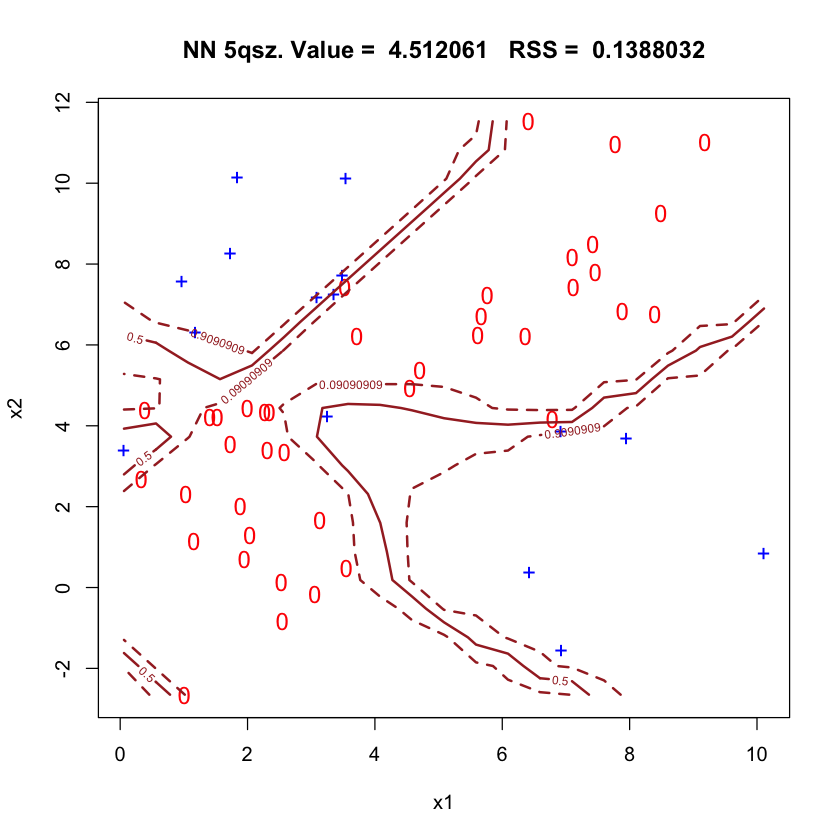

In [77]:
#####################
#
#
#   Size of the hidden layer = 5
#   (with quadratic and interaction terms)
#


nn.5qsz <- nnet( y ~ x1 + x2 + I(x1^2) + I(x2^2) + x1:x2, 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5qsz)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5qsz <- predict(nn.5qsz, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5qsz <- matrix(pHat5qsz, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5qsz. Value = ",prettyNum(nn.5qsz$value),
            "  RSS = ", prettyNum(sum(nn.5qsz$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  36
initial  value 71.821008 
iter  10 value 26.316694
iter  20 value 21.202376
iter  30 value 17.056464
iter  40 value 9.689663
iter  50 value 8.790797
iter  60 value 8.033004
iter  70 value 7.910454
iter  80 value 7.897899
iter  90 value 7.897439
iter 100 value 7.897426
final  value 7.897425 
converged


a 5-5-1 network with 36 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 
  2.17   0.45   2.67  -0.35  -1.74   2.98 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 i5->h2 
  1.33  -5.83  -0.65   1.42   0.09   0.66 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 i5->h3 
  0.08   0.23  -0.50   0.18  -0.29  -0.45 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 i5->h4 
  0.75   1.63   0.03  -0.58   2.13  -0.69 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 i5->h5 
 -0.12  -0.30   0.63  -0.22   0.29   0.56 
 b->o h1->o h2->o h3->o h4->o h5->o 
 0.86 -6.98  7.03 -0.91 -5.59  1.89 

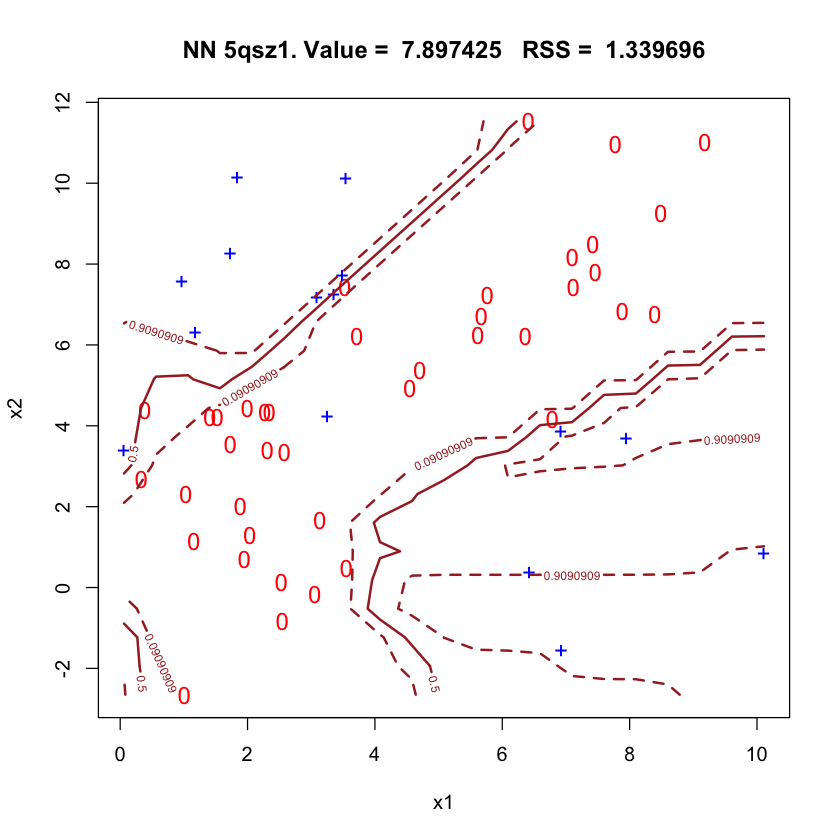

In [78]:
#
#  Repeat this twice
#


nn.5qsz1 <- nnet( y ~ x1 + x2 + I(x1^2) + I(x2^2) + x1:x2, 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5qsz1)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5qsz1 <- predict(nn.5qsz1, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5qsz1 <- matrix(pHat5qsz1, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5qsz1. Value = ",prettyNum(nn.5qsz1$value),
            "  RSS = ", prettyNum(sum(nn.5qsz1$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz1, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz1, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

# weights:  36
initial  value 37.631186 
iter  10 value 28.402591
iter  20 value 21.821391
iter  30 value 19.312801
iter  40 value 18.690656
iter  50 value 16.295334
iter  60 value 12.917962
iter  70 value 12.629993
iter  80 value 12.288775
iter  90 value 8.307910
iter 100 value 6.488241
iter 110 value 4.362229
iter 120 value 4.093188
iter 130 value 3.960522
iter 140 value 3.830474
iter 150 value 3.758336
iter 160 value 3.751848
iter 170 value 3.750587
iter 180 value 3.749298
iter 190 value 3.749197
iter 200 value 3.749191
final  value 3.749191 
converged


a 5-5-1 network with 36 weights
options were - entropy fitting  decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 
  1.32   0.21   2.73   1.66  -0.73  -1.09 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 i5->h2 
 -0.25  -1.12  -4.57  -0.84  -0.35   2.58 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 i5->h3 
  2.75   1.77   0.97  -0.33  -0.93   1.52 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 i5->h4 
  1.47   1.80   2.05  -0.40  -0.34  -0.61 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 i5->h5 
 -0.15  -4.04  -0.13   1.00   0.07   0.31 
 b->o h1->o h2->o h3->o h4->o h5->o 
 0.31  3.46 -8.22 -5.47 -4.66  5.55 

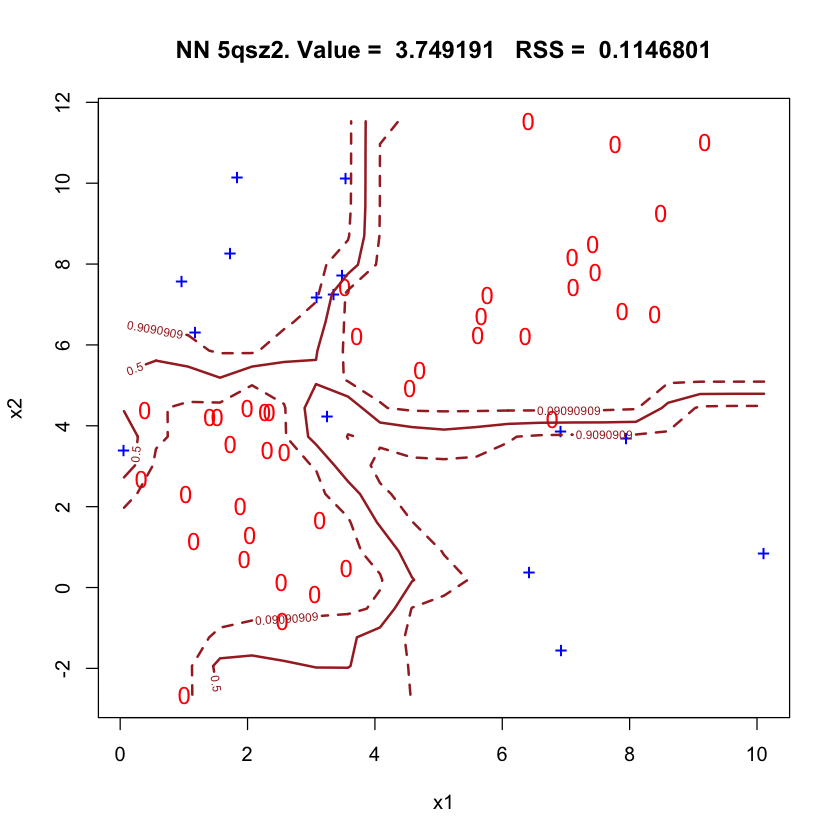

In [79]:
#
# Again
#

nn.5qsz2 <- nnet( y ~ x1 + x2 + I(x1^2) + I(x2^2) + x1:x2, 
                    data = checker.train, 
                    size = 5, 
                    decay=1.0E-2,
                    maxit = 1000)

summary(nn.5qsz2)

# Compute the fitted probabilities over this grid so that we can plot them.

pHat5qsz2 <- predict(nn.5qsz2, newdata = xgrid, type="raw")

# Put the predicted probabilities in the grid to be used by the contour
#  program

pHat5qsz2 <- matrix(pHat5qsz2, nrow = 21, ncol = 21, byrow = FALSE)

# plot it
plot(0,0,xlim=x1.range, ylim = x2.range,
     xlab = "x1", ylab = "x2", type ="n")
title(paste("NN 5qsz2. Value = ",prettyNum(nn.5qsz2$value),
            "  RSS = ", prettyNum(sum(nn.5qsz2$residuals^2))))
points(checker.train[checker.train[,"y"] == 0, c("x1", "x2")], pch="0",
        col="red", cex=1.2)
points(checker.train[checker.train[,"y"] == 1, c("x1", "x2")], pch="+",
        col="blue", cex=1.2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz2, 
        levels = 0.5, 
        add=T, 
        lty=1, col="brown", lwd=2)
contour(x=unique(xgrid[,1]), y=unique(xgrid[,2]),
        pHat5qsz2, 
        levels =c(1/11, 10/11), 
        add=T, 
        lty=2, col="brown", lwd=2)

In [80]:
# Look at misclassification probabilities
#
#  On the training data
#
# nn.5qsz
nn.5qsz$value
table(checker.train[,"y"], 
      predict(nn.5qsz, newdata= checker.train, type="raw") > 0.5)

[1] 4.512061

   
    FALSE TRUE
  0    40    0
  1     0   15

In [81]:
# nn.5qsz1
nn.5qsz1$value
table(checker.train[,"y"], 
      predict(nn.5qsz1, newdata= checker.train, type="raw") > 0.5)

[1] 7.897425

   
    FALSE TRUE
  0    40    0
  1     1   14

In [82]:
# nn.5qsz2
nn.5qsz2$value
table(checker.train[,"y"], 
      predict(nn.5qsz2, newdata= checker.train, type="raw") > 0.5)

[1] 3.749191

   
    FALSE TRUE
  0    40    0
  1     0   15

In [83]:
#
#  On the test data
#
# Checker.net
nn.5qsz$value
table(checker.test[,"y"], 
      predict(nn.5qsz, newdata= checker.test, type="raw") > 0.5)

[1] 4.512061

   
    FALSE TRUE
  0    90   10
  1    25   75

In [84]:
# checker.net1
nn.5qsz1$value
table(checker.test[,"y"], 
      predict(nn.5qsz1, newdata= checker.test, type="raw") > 0.5)

[1] 7.897425

   
    FALSE TRUE
  0    92    8
  1    24   76

In [85]:
# checker.net2
nn.5qsz2$value
table(checker.test[,"y"], 
      predict(nn.5qsz2, newdata= checker.test, type="raw") > 0.5)

[1] 3.749191

   
    FALSE TRUE
  0    91    9
  1    27   73

TODO : Get more scripts from http://www.math.uwaterloo.ca/~rwoldfor/software/R-code/